# Testing of various expt design types

In [1]:
# Point Python to the path where we have installed the bad and darc packages
import sys
sys.path.insert(0, '/Users/btvincent/git-local/darc-experiments-python')

In [2]:
import pandas as pd
import numpy as np

import darc
from darc.delayed import models
from darc.designs import DARCDesign, Griskevicius2011delay, Frye, Koffarnus_Bickel, Kirby2009

In [ ]:
from darc.data_plotting import plot_delay_without_front_end_delays

In [3]:
from darc_parameter_recovery import simulated_experiment_trial_loop

In [4]:
%config InlineBackend.figure_format = 'retina'

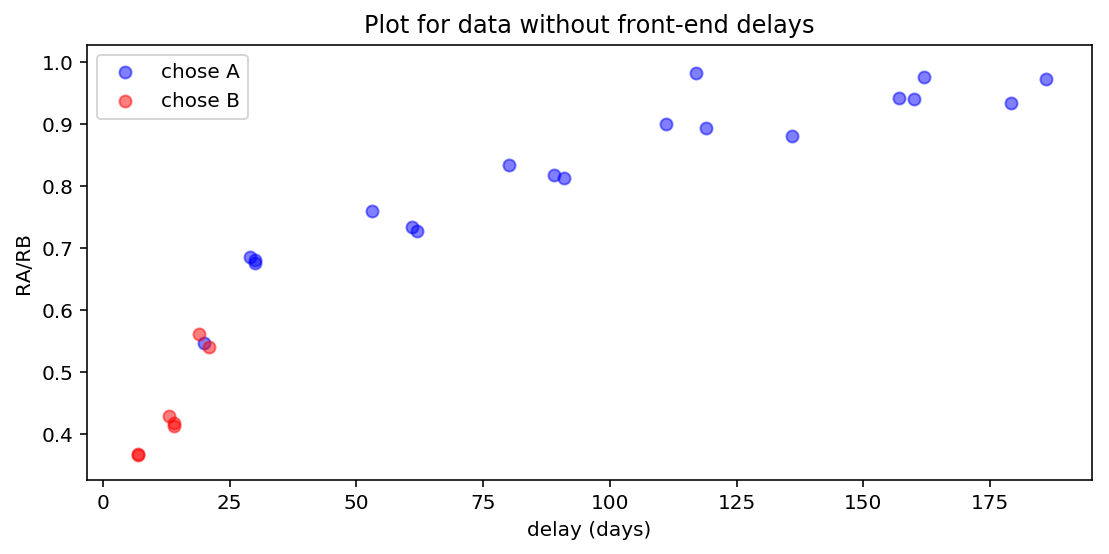

In [5]:
design_thing = Kirby2009()
model = models.Hyperbolic(n_particles=5000)
# model = model.generate_faux_true_params()
model.θ_true = pd.DataFrame.from_dict({'logk': [-3], 'α': [2]})
fitted_model = simulated_experiment_trial_loop(design_thing, model)
design_thing.plot_all_data()

## Testing `Griskevicius2011delay`

In [ ]:
design_thing = Griskevicius2011delay()
model = models.Hyperbolic(n_particles=5000)
model = model.generate_faux_true_params()
#model.θ_true = pd.DataFrame.from_dict({'logk': [-6], 'α': [5]})
fitted_model = simulated_experiment_trial_loop(design_thing, model)
design_thing.plot_all_data('Griskevicius2011delay')

In [ ]:
design_thing.all_data

## Testing `Frye`

In [ ]:
design_thing = Frye()
model = models.Hyperbolic(n_particles=5000)
# model = model.generate_faux_true_params()
model.θ_true = pd.DataFrame.from_dict({'logk': [-3], 'α': [2]})
fitted_model = simulated_experiment_trial_loop(design_thing, model)
design_thing.plot_all_data('Frye')

In [ ]:
fitted_model.get_θ_point_estimate()

In [ ]:
design_thing.all_data

## Testing `Koffarnus_Bickel`

In [ ]:
design_thing = Koffarnus_Bickel()
model = models.Hyperbolic(n_particles=5000)
model = model.generate_faux_true_params()
#model.θ_true = pd.DataFrame.from_dict({'logk': [-6], 'α': [5]})
fitted_model = simulated_experiment_trial_loop(design_thing, model)
design_thing.plot_all_data('Koffarnus_Bickel')

In [ ]:
design_thing.all_data

In [ ]:
fitted_model.get_θ_summary_stats('logk')

In [ ]:
fitted_model.parameter_names

## Test `DARCDesign`

In [ ]:
max_trials = 20

design_thing = DARCDesign(max_trials=max_trials,
                          RA=list(100*np.linspace(0.05, 0.95, 19)),
                          random_choice_dimension='DB')

model = models.Hyperbolic(n_particles=5000)

# model = model.generate_faux_true_params()
model.θ_true = pd.DataFrame.from_dict({'logk': [-6], 'α': [5]})
# model.θ_fixed = {'ϵ': 0.0}

fitted_model = simulated_experiment_trial_loop(design_thing, model)

In [ ]:
fitted_model.get_θ_summary_stats('logk')

In [ ]:
design_thing.all_data.head()

In [ ]:
design_thing.plot_all_data('temp')

## Test `DARCDesign` with only a few delay values

In [ ]:
max_trials = 20

design_thing = DARCDesign(max_trials=max_trials,
                          RA=list(np.arange(5, 99+1, 5)),
                          DB=[7, 30, 30*3, 30*6, 365], )#random_choice_dimension='DB')

model = models.Hyperbolic(n_particles=5000)

# model = model.generate_faux_true_params()
model.θ_true = pd.DataFrame.from_dict({'logk': [-6], 'α': [5]})
# model.θ_fixed = {'ϵ': 0.0}

fitted_model = simulated_experiment_trial_loop(design_thing, model)

In [ ]:
design_thing.plot_all_data('temp')

## Test of `DelaySlice` model

In [ ]:
max_trials = 20

design_thing = DARCDesign(max_trials=max_trials,
                          RA=list(100*np.linspace(0.05, 0.95, 50)),
                          DB=[180])

model = models.DelaySlice(n_particles=5000)

# model = model.generate_faux_true_params()
model.θ_true = pd.DataFrame.from_dict({'indiff': [0.6], 'α': [0.1]})

fitted_model = simulated_experiment_trial_loop(design_thing, model)

In [ ]:
design_thing.plot_all_data('temp')

In [ ]:
design_thing.all_data.head()

In [ ]:
model.get_θ_summary_stats('indiff')

## test of `DelaySlices` model

In [ ]:
max_trials = 20

delays = [7, 14, 30, 365]

design_thing = DARCDesign(max_trials=max_trials,
                          RA=list(100*np.linspace(0.05, 0.95, 50)),
                          DB=delays)

model = models.DelaySlices(n_particles=5000)
model.delays = delays

# model = model.generate_faux_true_params()
model.θ_true = pd.DataFrame.from_dict({'indiff1': [0.9],
                                       'indiff2': [0.8],
                                       'indiff3': [0.6],
                                       'indiff4': [0.3],
                                       'α': [0.01]})

fitted_model = simulated_experiment_trial_loop(design_thing, model)

In [ ]:
design_thing.plot_all_data('temp')